In [66]:
import json
import os
import glob 
import cv2
from mitok.image.cv_gpu import label, pairwise_distances
import numpy as np
import struct
import SimpleITK as sitk
import torch
from mitok.utils.mdicom import SERIES
import matplotlib.pyplot as plt
import nibabel as nib

def read_centerline(cpr_centerline_paths):
    with open(cpr_centerline_paths, mode='r') as f:
        centerline = json.load(f)
    return centerline

patient = '1022838'
series = 'B4776FB3_CTA'
vessel_centerline_path = '/mnt/DrwiseDataNFS/drwise_runtime_env/data1/inputdata'
plaque_centerline_file = '/mnt/users/code/test/cerebral_1022838_1.json'
plaque_mask_path = '/mnt/users/ffr_79datasets/ffr_cpr_mask_newmap'

all_vessel_id = []
all_centerline_range = []
with open(plaque_centerline_file, 'r') as f:
    datas = json.load(f)
    plaque_datas = datas["plaque"]
    for plaque_data in plaque_datas:
        plaque_type = plaque_data['plaque_type']
        if plaque_type == "calcified":
            merged_centerline_range = plaque_data['merged_centerline_range']
            all_centerline_range.append(merged_centerline_range)
            vessel_id = plaque_data['vessel_id']
            all_vessel_id.append(vessel_id)
print(all_vessel_id)
print(all_centerline_range)

cpr_plaque_mask_path = glob.glob(os.path.join(plaque_mask_path, patient, series, 'mask_plaque_round60.nii.gz'))[0]
vessel_mask_path = glob.glob(os.path.join(vessel_centerline_path, patient, '*', series, 'mask_source', 'mask_vessel.nii.gz'))[0]
plaque_data = nib.load(cpr_plaque_mask_path)
plaque_data = plaque_data.get_fdata()
print(plaque_data.shape)
plaque_region_data, plaque_label_area = label(plaque_data, 0, to_numpy=True, connectivity=1)
plaque_label_area = dict(map(lambda x: (x.label, x.area), plaque_label_area))
print(plaque_label_area)

#对中心线2D坐标转成3D坐标
axis_centerline_path = glob.glob(os.path.join(vessel_centerline_path, patient, '*', series, 'centerline'))[0]
    
# plaque_calcified = [] 
# for plaque_num, plaque_volume in plaque_label_area.items():
#     if plaque_volume < 100:
#         continue
#     print(plaque_num,plaque_volume)
#     for i in range(len(all_vessel_id)):
#         coro_id = all_vessel_id[i]
#         print('coro_id', coro_id)

#         axis_centerline_paths = os.path.join(axis_centerline_path, coro_id+'.3d')
#         all_axis_centerlines = read_centerline(axis_centerline_paths)
#         axis_centerlines = []
#         for k in range(all_centerline_range[i][0], all_centerline_range[i][1]):
#             axis_centerlines.append(all_axis_centerlines['points'][k])

#         plaque_index = np.argwhere(plaque_region_data==plaque_num)
#         #print('plaque_index', plaque_index)
#         #print('axis_centerlines', axis_centerlines)
#         distance = pairwise_distances(plaque_index, device=torch.device("cuda"), y=axis_centerlines)
#         #print(distance)
#         if np.min(distance) < 5:
#             if plaque_num not in plaque_calcified:
#                 plaque_calcified.append(plaque_num)
#                 break

plaque_calcified = [5, 27, 29, 43, 55]
print(plaque_calcified)

['coro001', 'coro003', 'coro041', 'coro043', 'coro043', 'coro001', 'coro003', 'coro041', 'coro043', 'coro001', 'coro001', 'coro002', 'coro002', 'coro003', 'coro003', 'coro041', 'coro041', 'coro043', 'coro043', 'coro001', 'coro003', 'coro041', 'coro043', 'coro022', 'coro024', 'coro032', 'coro033', 'coro034', 'coro022', 'coro032', 'coro033', 'coro034', 'coro032', 'coro033', 'coro003']
[[494, 557], [497, 575], [498, 573], [495, 561], [495, 561], [448, 482], [450, 482], [450, 482], [447, 482], [296, 393], [296, 393], [296, 344], [296, 344], [296, 395], [296, 395], [293, 393], [293, 393], [296, 393], [296, 393], [421, 443], [421, 443], [421, 443], [421, 444], [417, 494], [418, 495], [418, 495], [417, 495], [416, 495], [719, 747], [719, 748], [721, 748], [719, 752], [1182, 1206], [1163, 1187], [649, 666]]
(512, 512, 275)
{1: 1, 2: 2, 3: 6, 4: 11, 5: 5287, 6: 1, 7: 4, 8: 1, 9: 12, 10: 13, 11: 9, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 5, 23: 2, 24: 11, 25: 1,

(275, 512, 512)
{1: 1, 2: 2, 3: 6, 4: 11, 5: 5287, 6: 1, 7: 4, 8: 1, 9: 12, 10: 13, 11: 9, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 5, 23: 2, 24: 11, 25: 1, 26: 3, 27: 338, 28: 1, 29: 923, 30: 45, 31: 1, 32: 1, 33: 39, 34: 1, 35: 28, 36: 1, 37: 2, 38: 2, 39: 1, 40: 2, 41: 2, 42: 4, 43: 1112, 44: 4, 45: 17, 46: 6, 47: 1, 48: 10, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 3, 55: 2461, 56: 1, 57: 1, 58: 10, 59: 1, 60: 20, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 16, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 69, 79: 1, 80: 1, 81: 1, 82: 2, 83: 1, 84: 1, 85: 2, 86: 1, 87: 1, 88: 1, 89: 37}
[ -2  37  61 ... 122  51  27]


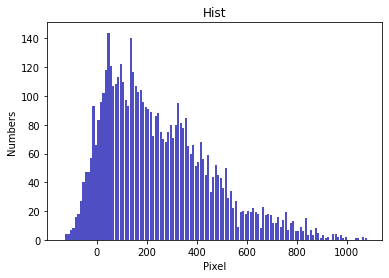

[ -40  -37   12    9   69   97   72  138  157  226  -61  -29   -1   69
   45  106   96  154  146  190  173  195  113  -80    2  -57  -12   37
   30  -29   38   93   97   -7   70  130   92  141  103  147  130   92
  144  110  138   86   69   -1   39  -24  -40  -53  -24  -10  -11  -10
  -34  -58  -20   22   39   32   26  -10   38   84  102   89   63   34
  102  154  171  142   90   11   62  142  199  210  192  102   64  154
  194  223  183   90   58  130  169  177  134  123  112   79   54   14
   35    6  -33  -25  -89  -63  -32   -6  -17  -38  -79  -41    9   48
   66   55   22  -33  -30   30  100  151  152  129   71   26  115  210
  266  255  194  114   26  -32   62  188  312  371  339  250  132   74
  216  359  416  376  260  127  -33   69  197  313  372  320  210  221
  257  215  133  103   50   13  -27 -115  -95  -60  -23  -11  -83  -45
   10   62   71   58  -36   42  116  174  174  135   57  -38   36  138
  238  290  277  198  103   12  119  248  355  388  336  235  112   36
  178 

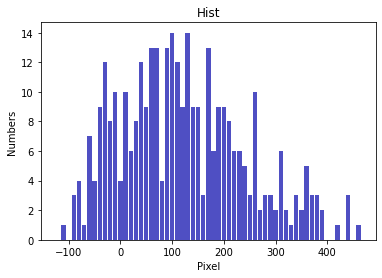

[ -9 -29 101  70  40  11 -11 211 179 139  96  52  13 318 308 300 263 208
 148  90  44   4 365 371 377 366 330 271 207 138  77  26 365 364 397 421
 435 429 406 358 277 184 105  46 381 361 354 369 409 443 477 491 471 408
 307 195 111 372 357 352 361 389 429 466 490 503 465 381 275 179 331 353
 369 398 432 461 475 459 394 324 240 365 382 400 419 431 425 384 344 394
 397 394 367 338 -27  84  46  23   6 -18 233 205 170 137 105  68  33 356
 344 325 297 253 194 136  86  46  10 428 445 460 465 441 391 315 230 153
  89  39   1 434 467 515 564 587 570 521 438 332 221 133  66  21 408 412
 432 495 583 661 692 684 632 533 402 274 169  88  37 404 400 411 459 547
 647 728 757 747 682 573 433 293 176  94 390 420 478 563 655 725 749 733
 657 545 405 272 171 405 457 532 608 656 675 640 565 461 332 241 425 484
 541 568 565 533 459 373 297 412 461 479 478 452 408 377 420   2  82  51
  36  23  17   8 264 216 186 161 144 122  93  21 407 381 378 362 339 290
 225 155  97  48   9 452 477 508 544 563 566 515 42

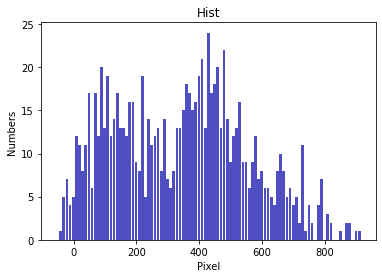

[263 176 104 ...  -6  32   4]


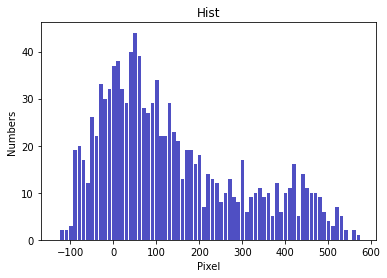

[ 97 131 117 ...  43 -48 -25]


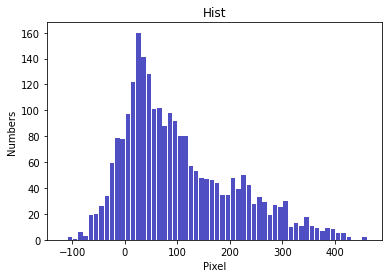

[0. 2. 3.]


In [67]:
# 参数依次为list,抬头,X轴标签,Y轴标签,XY轴的范围
def draw_hist(myList,Title,Xlabel,Ylabel,Xmin,Xmax,Ymin,Ymax):
    #plt.hist(myList,100)
    bins = range(Xmin, Xmax+1, 10)
    n, bins, patches = plt.hist(x=myList, bins=bins, color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.xlabel(Xlabel)
    #plt.xlim(Xmin,Xmax)
    plt.ylabel(Ylabel)
    #plt.ylim(Ymin,Ymax)
    plt.title(Title)
    plt.show()

def save_nii(plaque, data, vessel_data, nii_name):
    data[np.logical_and(data<=300, data!=0)] = 2
    data[data>300] = 3
    print(np.unique(data))
    vessel_data[data==2] = 2
    vessel_data[data==3] = 3
    affine_arr = np.eye(4)
    vessel_data = vessel_data.astype('float32')
    vessel_data = np.transpose(vessel_data, (2, 1, 0))
    plaque_nii = nib.Nifti1Image(vessel_data, affine_arr)
    nib.save(plaque_nii, os.path.join(plaque, nii_name)) 

plaque_data = np.transpose(plaque_data, (2,1,0))
print(plaque_data.shape)
plaque_region_data, plaque_label_area = label(plaque_data, 0, to_numpy=True, connectivity=1)
plaque_label_area = dict(map(lambda x: (x.label, x.area), plaque_label_area))
print(plaque_label_area)
dcm_folder = glob.glob(os.path.join(vessel_centerline_path, patient, '*', series.split('_CTA')[0]))[0]
series = SERIES(series_path=dcm_folder, strict_check_series=True)
img_tensor_int16 = series.get_image_tensor_int16()
vessel_data = nib.load(vessel_mask_path)
vessel_data = vessel_data.get_fdata()
vessel_data = np.transpose(vessel_data, (2, 1, 0))
data = np.zeros(vessel_data.shape)
for plaque_num, plaque_volume in plaque_label_area.items():
    if plaque_num in plaque_calcified:
        data_pixel = img_tensor_int16[plaque_region_data==plaque_num]
        print(data_pixel)
        min_value = min(data_pixel)
        max_value = max(data_pixel)
        draw_hist(data_pixel,'Hist','Pixel','Numbers',min_value-10,max_value+10,0,10)   # 直方图展示    
        data[plaque_region_data==plaque_num] = img_tensor_int16[plaque_region_data==plaque_num]
save_nii('/mnt/users', data, vessel_data, 'mask_plaque_brightness.nii.gz')

In [ ]:
import json
import os
import glob 
import cv2
from mitok.image.cv_gpu import label, pairwise_distances
import numpy as np
import struct
import SimpleITK as sitk
import torch
from mitok.utils.mdicom import SERIES
import matplotlib.pyplot as plt
import nibabel as nib

patient = '1022837'
series = '62D38FAD_CTA'
vessel_centerline_path = '/mnt/DrwiseDataNFS/drwise_runtime_env/data1/inputdata'
plaque_centerline_file = '/mnt/users/code/test/cerebral_1022837_1.json'
plaque_mask_path = '/mnt/DrwiseDataNFS/drwise_runtime_env/data1/inputdata'

# 参数依次为list,抬头,X轴标签,Y轴标签,XY轴的范围
def draw_hist(myList,Title,Xlabel,Ylabel,Xmin,Xmax,Ymin,Ymax):
    #plt.hist(myList,100)
    bins = range(Xmin, Xmax+1, 10)
    n, bins, patches = plt.hist(x=myList, bins=bins, color='#0504aa', alpha=0.7, rwidth=0.85)
    plt.xlabel(Xlabel)
    #plt.xlim(Xmin,Xmax)
    plt.ylabel(Ylabel)
    #plt.ylim(Ymin,Ymax)
    plt.title(Title)
    plt.show()

cpr_plaque_mask_path = glob.glob(os.path.join(vessel_centerline_path, patient, '*', series, 'mask_source', 'mask_plaque.nii.gz'))[0]
plaque_data = nib.load(cpr_plaque_mask_path)
plaque_data = plaque_data.get_fdata()
print(plaque_data.shape)
plaque_data = np.transpose(plaque_data, (2,1,0))
plaque_region_data, plaque_label_area = label(plaque_data, 0, to_numpy=True, connectivity=1)
plaque_label_area = dict(map(lambda x: (x.label, x.area), plaque_label_area))
dcm_folder = glob.glob(os.path.join(plaque_mask_path, patient, '*', series.split('_CTA')[0]))[0]
series = SERIES(series_path=dcm_folder, strict_check_series=True)
img_tensor_int16 = series.get_image_tensor_int16()
for plaque_num, plaque_volume in plaque_label_area.items():
    data_pixel = img_tensor_int16[plaque_region_data==plaque_num]
    print(data_pixel)
    min_value = min(data_pixel)
    max_value = max(data_pixel)
    draw_hist(data_pixel,'Hist','Pixel','Numbers',min_value-10,max_value+10,0,10)   # 直方图展示